In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_csv('transformed_df.csv')
display(df.head())

,Question,Question Category,LLM,Number of Sources,Trust Score,Are All Source Links Functional_all_links_functional,Are All Source Links Functional_no_links_functional,Are All Source Links Functional_some_links_functional,Multi-modal Response_multi-modal,Multi-modal Response_text_only,...,www.yellowbrick.co,www.yourdictionary.com,www.youtube.com,www.zavvi.com,www.zerohanger.com,wwww.britannica.com,y20india.in,yaleclimateconnections.org,yourstory.com,youtube.com
0,"""where does the saying keeping up with the jon...",4,3,2,10,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,"""when did day light savings start in the us""",6,3,1,9,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,"""what is the doll in the garden about""",2,3,3,11,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,"""where is a unitary system of government found""",9,3,3,11,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,"""who dies in season 2 of the originals""",2,3,1,9,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.drop('Question', axis=1, inplace=True)
display(df.head())
df.shape

,Question Category,LLM,Number of Sources,Trust Score,Are All Source Links Functional_all_links_functional,Are All Source Links Functional_no_links_functional,Are All Source Links Functional_some_links_functional,Multi-modal Response_multi-modal,Multi-modal Response_text_only,Unnamed: 10,...,www.yellowbrick.co,www.yourdictionary.com,www.youtube.com,www.zavvi.com,www.zerohanger.com,wwww.britannica.com,y20india.in,yaleclimateconnections.org,yourstory.com,youtube.com
0,4,3,2,10,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,6,3,1,9,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,3,11,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,9,3,3,11,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2,3,1,9,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


(500, 1083)

In [4]:
from sklearn.feature_selection import VarianceThreshold

threshold = 0.01
selector = VarianceThreshold(threshold)

df_reduced = selector.fit_transform(df)

selected_features = df.columns[selector.get_support()]

df_reduced = pd.DataFrame(df_reduced, columns=selected_features)

display(df_reduced.shape)

df_reduced.head()

(500, 38)

,Question Category,LLM,Number of Sources,Trust Score,Are All Source Links Functional_all_links_functional,Are All Source Links Functional_some_links_functional,Multi-modal Response_multi-modal,Multi-modal Response_text_only,Unnamed: 10,www.amazon.com,...,www.study.com,www.themoviedb.org,www.thoughtco.com,www.tvguide.com,www.verywellhealth.com,www.webmd.com,www.wikipedia.org,www.wikiwand.com,www.yahoo.com,www.youtube.com
0,4,3,2,10,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,3,1,9,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2,3,3,11,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,3,3,11,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2,3,1,9,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [5]:
scaler = StandardScaler()
df_reduced_scaled = scaler.fit_transform(df_reduced)
df_reduced_scaled = pd.DataFrame(df_reduced_scaled, columns=selected_features)

display(df_reduced_scaled.head())

,Question Category,LLM,Number of Sources,Trust Score,Are All Source Links Functional_all_links_functional,Are All Source Links Functional_some_links_functional,Multi-modal Response_multi-modal,Multi-modal Response_text_only,Unnamed: 10,www.amazon.com,...,www.study.com,www.themoviedb.org,www.thoughtco.com,www.tvguide.com,www.verywellhealth.com,www.webmd.com,www.wikipedia.org,www.wikiwand.com,www.yahoo.com,www.youtube.com
0,-0.536683,0.0,-0.507689,-0.021955,0.648425,-0.163383,-0.546536,0.59583,-0.61125,-0.163383,...,-0.142857,-0.110208,-0.169725,-0.110208,-0.110208,-0.119159,-0.984126,-0.119159,-0.110208,-0.286794
1,0.046668,0.0,-0.763580,-0.181053,0.648425,-0.163383,-0.546536,0.59583,-0.61125,-0.163383,...,-0.142857,-0.110208,-0.169725,-0.110208,-0.110208,-0.119159,1.016130,-0.119159,-0.110208,-0.286794
2,-1.120033,0.0,-0.251797,0.137142,0.648425,-0.163383,-0.546536,0.59583,-0.61125,-0.163383,...,-0.142857,-0.110208,-0.169725,-0.110208,-0.110208,-0.119159,-0.984126,-0.119159,-0.110208,-0.286794
3,0.921694,0.0,-0.251797,0.137142,0.648425,-0.163383,-0.546536,0.59583,-0.61125,-0.163383,...,-0.142857,-0.110208,-0.169725,-0.110208,-0.110208,-0.119159,1.016130,-0.119159,-0.110208,-0.286794
4,-1.120033,0.0,-0.763580,-0.181053,0.648425,-0.163383,-0.546536,0.59583,-0.61125,-0.163383,...,-0.142857,-0.110208,-0.169725,-0.110208,-0.110208,-0.119159,1.016130,-0.119159,-0.110208,-0.286794


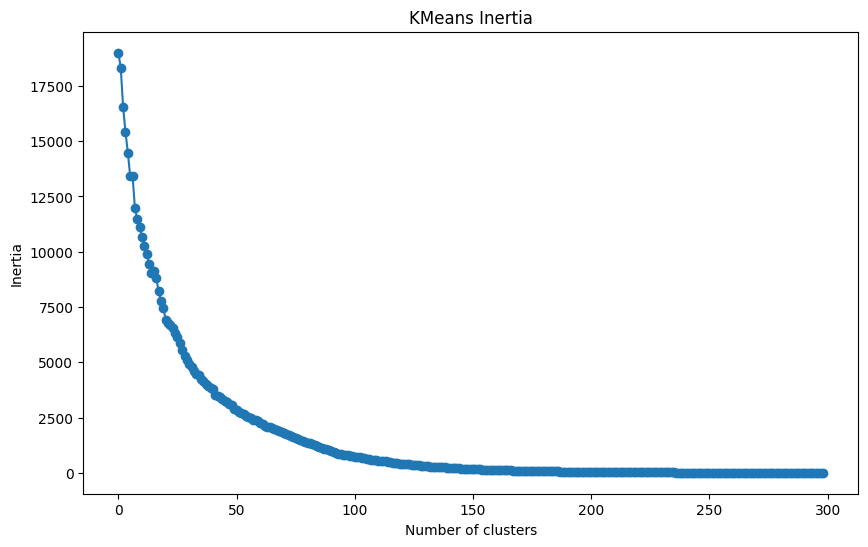

In [6]:
from sklearn.cluster import KMeans

inertia = []
range_clusters = range(1, 300)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_reduced_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(inertia, marker='o')
plt.title('KMeans Inertia')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [7]:
from sklearn.metrics import silhouette_score

for k in range(10, 200, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_reduced_scaled)
    score = silhouette_score(df_reduced_scaled, kmeans.labels_)
    print(f'Number of clusters: {k}, silhouette score: {score}')

Number of clusters: 10, silhouette score: 0.2394157594680589
Number of clusters: 20, silhouette score: 0.2872223059027366
Number of clusters: 30, silhouette score: 0.34865760525309747
Number of clusters: 40, silhouette score: 0.37052660795357273
Number of clusters: 50, silhouette score: 0.4009900533810171
Number of clusters: 60, silhouette score: 0.3812942028491142
Number of clusters: 70, silhouette score: 0.3629220759696238
Number of clusters: 80, silhouette score: 0.37831658929603396
Number of clusters: 90, silhouette score: 0.42212905202013684
Number of clusters: 100, silhouette score: 0.4431080819998175
Number of clusters: 110, silhouette score: 0.4736000950756004
Number of clusters: 120, silhouette score: 0.46976104007368313
Number of clusters: 130, silhouette score: 0.46877480611014016
Number of clusters: 140, silhouette score: 0.4663312907472093
Number of clusters: 150, silhouette score: 0.4646062415813421
Number of clusters: 160, silhouette score: 0.47520684701211574
Number of 

In [8]:
kmeans = KMeans(n_clusters=175, random_state=42).fit(df_reduced_scaled)

In [9]:
from collections import Counter
cluster_sizes = Counter(kmeans.labels_)
print("Cluster Sizes: ", cluster_sizes) 

Cluster Sizes:  Counter({131: 24, 37: 24, 72: 22, 92: 19, 145: 15, 0: 11, 157: 10, 21: 10, 78: 10, 129: 10, 110: 9, 127: 9, 2: 9, 146: 8, 46: 8, 151: 8, 143: 8, 137: 7, 168: 7, 160: 7, 154: 7, 20: 7, 1: 7, 105: 6, 172: 6, 3: 6, 126: 6, 155: 5, 32: 5, 89: 5, 135: 4, 16: 4, 51: 4, 156: 4, 26: 4, 165: 4, 12: 4, 81: 3, 62: 3, 53: 3, 54: 3, 118: 3, 138: 3, 6: 3, 5: 3, 96: 3, 103: 3, 148: 2, 25: 2, 14: 2, 77: 2, 31: 2, 108: 2, 116: 2, 67: 2, 152: 2, 19: 2, 161: 2, 140: 2, 123: 2, 79: 2, 4: 2, 171: 2, 17: 2, 104: 2, 158: 2, 167: 1, 30: 1, 163: 1, 41: 1, 122: 1, 101: 1, 88: 1, 43: 1, 71: 1, 170: 1, 45: 1, 87: 1, 42: 1, 75: 1, 80: 1, 10: 1, 83: 1, 34: 1, 86: 1, 124: 1, 9: 1, 153: 1, 99: 1, 173: 1, 82: 1, 84: 1, 125: 1, 102: 1, 95: 1, 117: 1, 65: 1, 106: 1, 33: 1, 97: 1, 85: 1, 18: 1, 119: 1, 57: 1, 132: 1, 52: 1, 149: 1, 134: 1, 133: 1, 49: 1, 40: 1, 142: 1, 91: 1, 136: 1, 113: 1, 58: 1, 24: 1, 27: 1, 61: 1, 100: 1, 120: 1, 59: 1, 164: 1, 141: 1, 38: 1, 114: 1, 50: 1, 44: 1, 174: 1, 90: 1, 162:

In [10]:
df_reduced['Cluster'] = kmeans.labels_
df_reduced.head()

,Question Category,LLM,Number of Sources,Trust Score,Are All Source Links Functional_all_links_functional,Are All Source Links Functional_some_links_functional,Multi-modal Response_multi-modal,Multi-modal Response_text_only,Unnamed: 10,www.amazon.com,...,www.themoviedb.org,www.thoughtco.com,www.tvguide.com,www.verywellhealth.com,www.webmd.com,www.wikipedia.org,www.wikiwand.com,www.yahoo.com,www.youtube.com,Cluster
0,4,3,2,10,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,105
1,6,3,1,9,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,110
2,2,3,3,11,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,146
3,9,3,3,11,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,167
4,2,3,1,9,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,46


In [ ]:
cluster_summary = df_reduced.groupby('Cluster').mean()
display(cluster_summary)

,Question Category,LLM,Number of Sources,Trust Score,Are All Source Links Functional_all_links_functional,Are All Source Links Functional_some_links_functional,Multi-modal Response_multi-modal,Multi-modal Response_text_only,Unnamed: 10,www.amazon.com,...,www.study.com,www.themoviedb.org,www.thoughtco.com,www.tvguide.com,www.verywellhealth.com,www.webmd.com,www.wikipedia.org,www.wikiwand.com,www.yahoo.com,www.youtube.com
Cluster,,,,,,,,,,,,,,,,,,,,,
0,5.727273,2.000000,0.000000,1.000000,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.571429,1.000000,11.285714,18.285714,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,9.888889,1.888889,1.333333,9.666667,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,7.333333,5.000000,6.666667,15.666667,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.000000,5.000000,6.500000,15.500000,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,2.000000,3.000000,0.000000,2.000000,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171,2.000000,1.000000,8.500000,16.500000,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172,1.833333,4.000000,1.000000,9.166667,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
cluster_sizes = Counter(kmeans.labels_)
print("Cluster Sizes: ", cluster_sizes)

Cluster Sizes:  Counter({131: 24, 37: 24, 72: 22, 92: 19, 145: 15, 0: 11, 157: 10, 21: 10, 78: 10, 129: 10, 110: 9, 127: 9, 2: 9, 146: 8, 46: 8, 151: 8, 143: 8, 137: 7, 168: 7, 160: 7, 154: 7, 20: 7, 1: 7, 105: 6, 172: 6, 3: 6, 126: 6, 155: 5, 32: 5, 89: 5, 135: 4, 16: 4, 51: 4, 156: 4, 26: 4, 165: 4, 12: 4, 81: 3, 62: 3, 53: 3, 54: 3, 118: 3, 138: 3, 6: 3, 5: 3, 96: 3, 103: 3, 148: 2, 25: 2, 14: 2, 77: 2, 31: 2, 108: 2, 116: 2, 67: 2, 152: 2, 19: 2, 161: 2, 140: 2, 123: 2, 79: 2, 4: 2, 171: 2, 17: 2, 104: 2, 158: 2, 167: 1, 30: 1, 163: 1, 41: 1, 122: 1, 101: 1, 88: 1, 43: 1, 71: 1, 170: 1, 45: 1, 87: 1, 42: 1, 75: 1, 80: 1, 10: 1, 83: 1, 34: 1, 86: 1, 124: 1, 9: 1, 153: 1, 99: 1, 173: 1, 82: 1, 84: 1, 125: 1, 102: 1, 95: 1, 117: 1, 65: 1, 106: 1, 33: 1, 97: 1, 85: 1, 18: 1, 119: 1, 57: 1, 132: 1, 52: 1, 149: 1, 134: 1, 133: 1, 49: 1, 40: 1, 142: 1, 91: 1, 136: 1, 113: 1, 58: 1, 24: 1, 27: 1, 61: 1, 100: 1, 120: 1, 59: 1, 164: 1, 141: 1, 38: 1, 114: 1, 50: 1, 44: 1, 174: 1, 90: 1, 162:

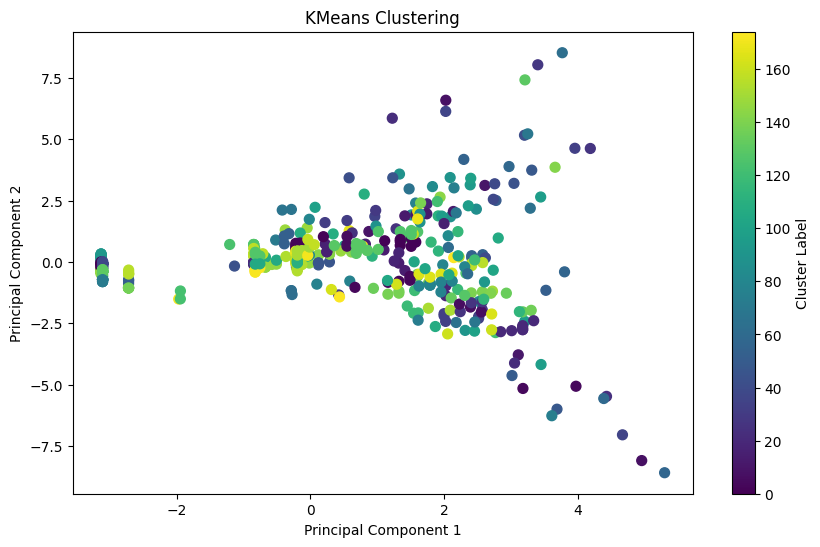

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_reduced_pca = pca.fit_transform(df_reduced_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_reduced_pca[:, 0], df_reduced_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.colorbar(scatter, label='Cluster Label')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering')
plt.show()